In [1]:
import numpy as np
from math import sqrt
import pandas as pd
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import * # pip install graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from pprint import pprint

/var/folders/m7/bn7r1sg94s539hr0hp_6s2_h0000gn/T/ipykernel_37553/3659428565.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Carga de datos.
# Carga de datos.
datos = pd.read_csv('data/boston.csv', sep="\s+", skiprows=22, header=None)
X = np.hstack([datos.values[::2, :], datos.values[1::2, :2]])
y = datos.values[1::2, 2]
print(np.shape(X))

(242, 16)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(193, 16)


In [5]:
# 2) Extracción de características (no es necesario en este caso)

In [6]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_training = standardizer.fit_transform(X_training)

In [7]:
# # 4) Selección de atributos
sel = SelectPercentile(score_func=f_regression, percentile=90)
X_training = sel.fit_transform(X_training, y_training)
print(np.shape(X_training))

(193, 14)


In [8]:
# 5) Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='uniform', metric='euclidean')

cross_val_MAE:   1.5235 +/- 0.4670


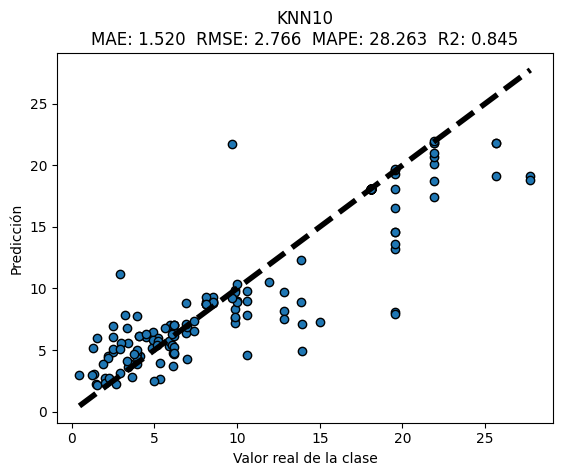

In [9]:
# 5.1) Validación cruzada interna
# Extracción de predicciones con cross_val_predict
y_pred = cross_val_predict(reg, X_training, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_val_score(reg, X_training, y_training, 
                                    cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))

# Visualización de resultados
results = evaluacion(y_training, y_pred, metricas)
grafica_real_vs_pred(y_training, y_pred, results, "KNN"+str(k))

In [10]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_training, y_training)

In [11]:
# ---- PREDICCIÓN ---- #

In [12]:
# 6) Extracción de las características de test

In [13]:
# 7) Estandarización de las característiacs de test
X_test = standardizer.transform(X_testing)

In [14]:
# 8) Selección de las características de test
X_test = sel.transform(X_test)

In [15]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test)

In [16]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
pprint(results)

{'MAE': 1.1226326530612247,
 'MAPE': 20.44703685411245,
 'R2': 0.9135418842325627,
 'RMSE': 1.7916455154581288}


In [17]:
# Comparación con el algoritmo de regresión lineal en test
reg_OLS = linear_model.LinearRegression() # definición
model_OLS = reg_OLS.fit(X_training,y_training) # entrenamiento completo
y_pred_OLS = model_OLS.predict(X_test) # Predicción
results = evaluacion(y_testing, y_pred_OLS, metricas) # Evaluación de resultados
pprint(results)

{'MAE': 0.6071557000551949,
 'MAPE': 13.038183199507413,
 'R2': 0.9768213267383069,
 'RMSE': 0.9276699534864962}
